# 코사인 유사도

In [11]:
import numpy as np
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt

In [81]:
'''
test dir 목록 : baji / banbaji / banpal / blouse / cardigan / coat / ginpal / jacket / mantoman / nambang
                / neat / onepiece / padding / skirt / training / bluejean
'''
# 카테고리별 파일 경로
# root_dir = 'D:/bunjang/train/banpal' # 디렉토리
root_dir = 'D:/bunjang/data/backup/banpal'
 
img_path_list = []
possible_img_extension = ['.jpg', '.JPG'] # 이미지 확장자들

# 해당 경로에 있는 해당 확장자 파일들을 전부 불러옴
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                img_path_list.append(img_path)
                             
print(img_path_list[:5])
print(type(img_path_list[0]))

['D:/bunjang/data/backup/banpal/100212200_1.jpg', 'D:/bunjang/data/backup/banpal/100212200_2.jpg', 'D:/bunjang/data/backup/banpal/100212200_3.jpg', 'D:/bunjang/data/backup/banpal/100212200_4.jpg', 'D:/bunjang/data/backup/banpal/100212200_5.jpg']
<class 'str'>


In [74]:
import cv2

In [83]:
## OpenCV2로 이미지 입력받기
img1 = cv2.imread("../bunjang/test_banpal1.jpg")
## 64*64로 사이즈 조절
img1 = cv2.resize(img1, (64,64))
## 0~255 사이의 값으로 이루어진 픽셀값들을 255로 나누어 정규화
img1_np = img1/255
## 3차원 이미지를 2차원 행렬로 변환
img1_np = img1_np.reshape(1,-1)
print(img1_np)

[[1. 1. 1. ... 1. 1. 1.]]


In [84]:
# 해당 경로에 있는 모든 파일들도  전처리
img_list = []
for i in tqdm(range(len(img_path_list))):
    # 같은 카테고리로 분류된 이미지 데이터셋 내 이미지 모두 불러오기
    img = cv2.imread(img_path_list[i])
    # 똑같이 벡터화
    img = cv2.resize(img, (64,64))
    img_np = img/255
    img_np = img_np.reshape(1,-1)
    # 비교를 위해 img_list 변수에 따로 저장
    img_list.append(img_np)

In [85]:
# 사이킷런에서 제공하는 코사인 유사도 함수를 적용
from sklearn.metrics.pairwise import cosine_similarity

result = []
for i in tqdm(range(len(img_list))):
    # 원본 이미지와 데이터셋의 이미지들을 전부 함수에 입력
    similarity_simple_pair = cosine_similarity(img1_np, img_list[i])
    # 결과값들을 result 변수에 저장
    result.append(similarity_simple_pair)

In [86]:
## 확인용 데이터 프레임 생성
import pandas as pd

# 컬럼1은 이미지의 위치, 컬럼2는 코사인 결과값으로 설정
list_df = pd.DataFrame({'img_id':img_path_list, 'num':result})
# 결과값을 기준으로 내림차순 정렬
list_df = list_df.sort_values(by='num', ascending=False)
# 인덱스 재정렬
list_df = list_df.reset_index(drop=True)
list_df.head(5)

,img_id,num
0,D:/bunjang/data/backup/banpal/151670046_1.jpg,[[0.9634413985050425]]
1,D:/bunjang/data/backup/banpal/151689001_1.jpg,[[0.9556709889923116]]
2,D:/bunjang/data/backup/banpal/151658854_9.jpg,[[0.9547532885025363]]
3,D:/bunjang/data/backup/banpal/151665921_1.jpg,[[0.9529940117448084]]
4,D:/bunjang/data/backup/banpal/151665972_1.jpg,[[0.9528166423322935]]


In [147]:
# list_df의 img_id 데이터 경로에서 숫자값만 추출
img_path_du = []

for i in range(len(list_df.img_id)):
    k = os.path.basename(list_df['img_id'][i])
    k = os.path.splitext(k)
    img_path_du.append(int(k[0].split('_')[0]))
    
img_path_du[:5]

[99149275, 99149275, 105238502, 84395028, 121394433]

In [148]:
# 데이터 프레임 생성
data = pd.DataFrame({'img_id':img_path_du, 'num':result})
data = data.drop_duplicates('img_id', keep = 'first')
data.reset_index(drop=True, inplace=True)
data = data.sort_values(by='num', ascending=False)
data = data.reset_index(drop=True)

data.head()

,img_id,num
0,113631196,[[0.9858624850337552]]
1,122651604,[[0.9767742976031397]]
2,122118955,[[0.97116557671419]]
3,106130019,[[0.9705013157988727]]
4,122095780,[[0.9689558263706486]]


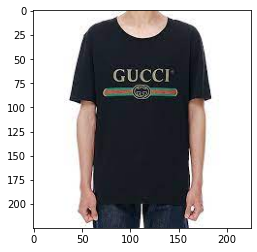

원본


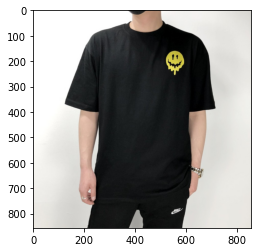

정확도 : 96.34%


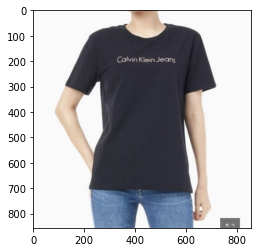

정확도 : 95.57%


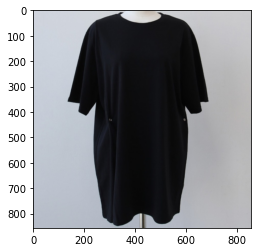

정확도 : 95.48%


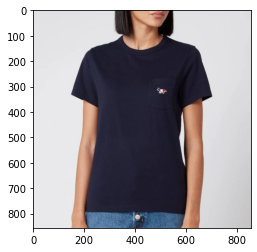

정확도 : 95.3%


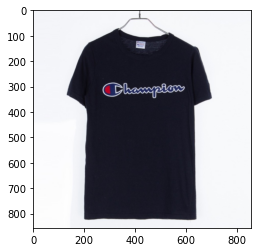

정확도 : 95.28%


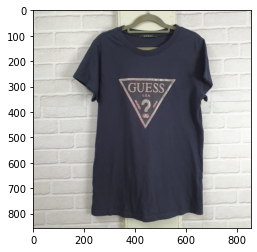

정확도 : 95.28%


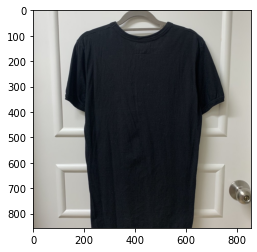

정확도 : 95.14%


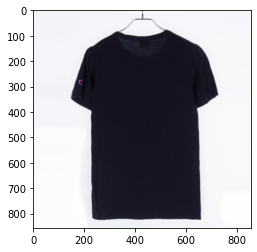

정확도 : 95.08%


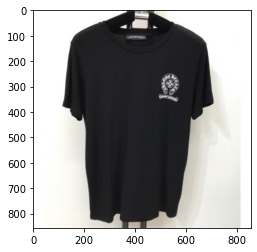

정확도 : 95.07%


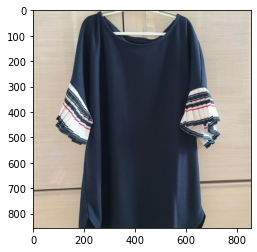

정확도 : 94.98%


In [89]:
# 상위 10개의 이미지를 보여주기(원본 포함)
original = cv2.imread("../bunjang/test_banpal1.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(original)
img_original = cv2.merge([r,g,b])

plt.imshow(img_original)
plt.show()
print('원본')    

for i in range(10):
    img = cv2.imread(list_df.img_id[i], cv2.IMREAD_COLOR)
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    plt.imshow(img2)
#     print(df2.num[i])
#     plt.savefig('../bunjang/result_bluejean_{}.png'.format(i))
    plt.show()
    print('정확도 : {}%'.format(np.around(list_df.num[i][0][0]*100,2)))

# 메타 데이터와 연결

In [71]:
import pandas as pd

# 해당 카테고리에 맞는 메타 데이터 부르고 정리
meta = pd.read_csv('D:/bunjang/csv_metadata/08_반팔티셔츠_meta_data.csv', encoding='utf-8')
meta.drop(['Unnamed: 0'], axis = 1, inplace = True)
meta = meta.drop_duplicates('img_id', keep = 'first')
meta.reset_index(drop=True, inplace=True)
meta.head()

,img_id,title,category_big,category_mid,price,detail,region,status,file_count,url
0,80934486,핑크데이지 체크레이스 탑,여성의류,반팔티셔츠,"20,000원",정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...,서울특별시 도봉구 창제5동,새상품,8,https://m.bunjang.co.kr/products/80934486?ref=...
1,151695945,퍼플라벨 반팔 새상품,여성의류,반팔티셔츠,"17,000원","정가 32,000원S사이즈 택있는 새상품제 상점에서 두 개 이상 구매 시 에눌가능",부산광역시 해운대구 반여제2동,새상품,3,https://m.bunjang.co.kr/products/151695945?ref...
2,151695835,스파이더 반팔,여성의류,반팔티셔츠,"35,000원",2번입음,경기도 성남시 중원구 성남동,중고,2,https://m.bunjang.co.kr/products/151695835?ref...
3,151695814,스파이더 반팔 S,여성의류,반팔티셔츠,"35,000원",하자없고 거의새거에요,경기도 김포시 구래동,중고,1,https://m.bunjang.co.kr/products/151695814?ref...
4,130996543,38 라코스테 여성 반팔 카라티,여성의류,반팔티셔츠,"15,000원",실제 측정 사이즈 : 90가슴단면cm : 45총장cm : 65상 세 내 용 : 라코...,전국,중고,5,https://m.bunjang.co.kr/products/130996543?ref...


In [72]:
# data를 기준으로 meta와 병합
test2 = pd.merge(data, meta, on='img_id')
test2.head()

,img_id,num,title,category_big,category_mid,price,detail,region,status,file_count,url
0,125336492,[[1.0000000000000024]],거의새것)여성 반팔티 브랜드 모음 10종류 만원,여성의류,반팔티셔츠,"5,000원","🌷kswiss(정품)케이스위스 반팔티 s 구매가 59,000원(2회)🌷밀크코코아 화...",서울특별시 송파구 방이2동,새상품,11,https://m.bunjang.co.kr/products/125336492?ref...
1,124011644,[[0.9208873046195936]],반팔,여성의류,반팔티셔츠,"4,000원",중학교1학년때사서 열번쯤입었어서 4000원에 팔아욤,부산광역시 해운대구 송정동,중고,2,https://m.bunjang.co.kr/products/124011644?ref...
2,129936030,[[0.9199676974234198]],딥블루 여리핏 반팔,여성의류,반팔티셔츠,"4,500원",반팔티 입니다입고 후기 남기느라 한번 입어봤어요 거의 새 상품엄청 예쁘고 체형커버 ...,대구광역시 북구 국우동,중고,2,https://m.bunjang.co.kr/products/129936030?ref...
3,151692098,[[0.9197400658832549]],(새상품) 면 반팔티,여성의류,반팔티셔츠,"9,000원",NaN,전국,새상품,1,https://m.bunjang.co.kr/products/151692098?ref...
4,151688806,[[0.9162755675033074]],박시티셔츠,여성의류,반팔티셔츠,"10,000원","전부 새상품이며 미개봉상품 입니다가격은 1장당 10,000원이에요 (택비별도)사이즈...",서울특별시 중랑구 망우제3동,새상품,1,https://m.bunjang.co.kr/products/151688806?ref...


In [73]:
# 필요한 열만 추출
test3 = test2[['img_id', 'num', 'price', 'detail']][:10]
test3

,img_id,num,price,detail
0,125336492,[[1.0000000000000024]],"5,000원","🌷kswiss(정품)케이스위스 반팔티 s 구매가 59,000원(2회)🌷밀크코코아 화..."
1,124011644,[[0.9208873046195936]],"4,000원",중학교1학년때사서 열번쯤입었어서 4000원에 팔아욤
2,129936030,[[0.9199676974234198]],"4,500원",반팔티 입니다입고 후기 남기느라 한번 입어봤어요 거의 새 상품엄청 예쁘고 체형커버 ...
3,151692098,[[0.9197400658832549]],"9,000원",NaN
4,151688806,[[0.9162755675033074]],"10,000원","전부 새상품이며 미개봉상품 입니다가격은 1장당 10,000원이에요 (택비별도)사이즈..."
5,134045730,[[0.9141683508825743]],"5,000원",실제색감 너무 예쁩니다ㅠ^ㅠ💘연청바지에 입으면 엄청 예쁠 것 같아 구매했는데연청바지...
6,151689533,[[0.9138715762721504]],"1,000원",기본 반팔티구요 뒤에 야자수프린팅이 있어서 이뻐요청바지나 청치마에 입으면 이뻐요사이...
7,127806357,[[0.9136465146193409]],"2,000원",이너로 입기 좋아요~~길이 57cm가슴단면 35cm☆범어탑마트앞 직거래☆묶음배송가능...
8,151666802,[[0.9111126799522604]],"25,000원","✔25,000원(배송비3,000)✔사이즈 : S / M제주/도서산간지역 배송비추가💥..."
9,151432949,[[0.911048482260201]],"25,000원",키르시 검정색 링거티 팔아요작년에 몇번안입었어요 늘어짐x하자x


In [74]:
## 데이터 정제
# 문자인 '원'과 ',' 을 빈 칸으로 변환
test3['price'] = test3['price'].str.replace('원',' ')
test3['price'] = test3['price'].replace({',': ''}, regex=True)
# str 형태인 price를 int로 변환
test3['price'] = pd.to_numeric(test3['price'])
test3.head()

,img_id,num,price,detail
0,125336492,[[1.0000000000000024]],5000,"🌷kswiss(정품)케이스위스 반팔티 s 구매가 59,000원(2회)🌷밀크코코아 화..."
1,124011644,[[0.9208873046195936]],4000,중학교1학년때사서 열번쯤입었어서 4000원에 팔아욤
2,129936030,[[0.9199676974234198]],4500,반팔티 입니다입고 후기 남기느라 한번 입어봤어요 거의 새 상품엄청 예쁘고 체형커버 ...
3,151692098,[[0.9197400658832549]],9000,NaN
4,151688806,[[0.9162755675033074]],10000,"전부 새상품이며 미개봉상품 입니다가격은 1장당 10,000원이에요 (택비별도)사이즈..."


In [75]:
# 유사도 높은 상위 10개 상품의 가격을 매기기
p_mean = int(test3['price'].mean())
p_max = int(test3['price'].max())
p_min = int(test3['price'].min())

print('최대가 : {}원'.format(p_max))
print('최소가 : {}원'.format(p_min))
print('평균가 : {}원'.format(p_mean))

최대가 : 25000원
최소가 : 1000원
평균가 : 9050원
